# ¿Cómo calcular $\pi$?

![calculo pi](https://raw.githubusercontent.com/jmbarrios/THC-Python/07195075ebcb12351150a3440c58e2c99f6328d0/imgs/pi.png)

Una manera de calcular el valor de $\pi$ es usando el Método Monte Carlo. Para esto se debe de hacer lo siguiente:

* Generar $n$ números aleatorios en el cuadrado $[0, 1]\times[0, 1]$. 
* Calcular el cociente entre el número de puntos que caen dentro del cuarto del círculo de radio 1 y $n$.
* A este cociente multiplicarlo 4 y esa será una aproximación a $\pi$.



In [ ]:
#@title Grafica de Monte Carlo Pi

import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

# Generación de datos
x = np.linspace(0, 1)
y = np.sqrt(1-x**2)

rng = default_rng(12345)
sample = rng.random(500).reshape(-1, 2)
rho = np.sqrt(np.sum(sample**2, axis=1))

# Graficación
plt.figure(figsize=(10, 10))

plt.fill_between(x, 0, 1)
plt.fill_between(x, 0, y)

plt.scatter(sample[rho > 1, 0], sample[rho > 1, 1], s=80, marker='o', color='r')
plt.scatter(sample[rho <= 1, 0], sample[rho <= 1, 1], s=80, marker='o', color='b')

plt.axis('square')

In [1]:
import numpy as np
from numpy.random import default_rng # rng = Random Number Generator

In [2]:
generador = default_rng(12345)

In [3]:
type(generador)

numpy.random._generator.Generator

In [4]:
print(generador.random(10))

[0.22733602 0.31675834 0.79736546 0.67625467 0.39110955 0.33281393
 0.59830875 0.18673419 0.67275604 0.94180287]


In [5]:
print(generador.random(10))

[0.24824571 0.94888115 0.66723745 0.09589794 0.44183967 0.88647992
 0.6974535  0.32647286 0.73392816 0.22013496]


In [6]:
puntos = generador.random(2000) # sera un array con 'shape' (2000,)
puntos = puntos.reshape((2, -1)) # array de 'shape' (2, 1000)
print(puntos[:5, :5])

[[0.08159457 0.1598956  0.34010018 0.46519315 0.26642103]
 [0.120313   0.35923352 0.76248061 0.58898045 0.36584423]]


In [7]:
import matplotlib.pyplot as plt

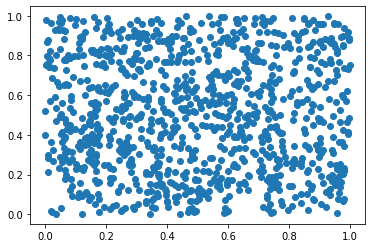

In [8]:
plt.scatter(puntos[0, :], puntos[1, :])

In [9]:
rho = np.sqrt(puntos[0, :]**2 + puntos[1, :]**2) # 'shape' de rho sera (1000,)
print(rho.shape)
print(rho[:10])

(1000,)
[0.14537156 0.39321156 0.8348921  0.7505349  0.45257283 0.96245397
 0.19652224 0.37198635 0.69996797 0.59881669]


In [12]:
4*np.sum(rho <= 1)/1000

3.22

In [23]:
puntos = generador.random(500_000).reshape((2, -1))
rho = np.sqrt(np.sum(puntos**2, axis=0))

In [24]:
seq = []
for n in range(rho.shape[0]):
    seq.append(4*np.sum(rho[:n] <= 1)/(n+1))

(3.0, 3.3)

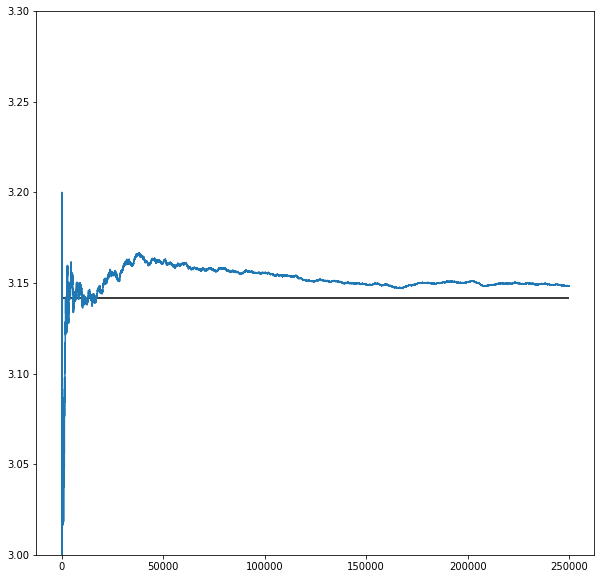

In [25]:
plt.figure(figsize=(10, 10))
plt.plot(seq)
plt.hlines(np.pi, 0, rho.shape[0])
plt.ylim(3, 3.3)

# ¿Pero como genera los número aletorios la computadora?
## Generador lineal de congruencias

Una manera de generar números aleatorios es generando la siguiente sucesión: 

$$
x_{n+1} \equiv ax_{n}+b\quad (\textrm{mod }n)
$$


In [26]:
def our_rng(a, b, n, seed):
    """ generador lineal de congruencias

    genera numeros aleatorios con la regla x_n+1 = a*x_n+b (mod n),
    donde x_0 = seed

    Args:
        a: int 0<=b<n
        b: int 0<=b<n
        n: int valor del modulo
        seed: int 0<=b<n
    
    Returns:
        int 0<=b<n numero siguiente en la iteracion
    """
    return (a*seed+b) % n

In [27]:
a = 7
b = 11
n = 27
seed = 23

sample = [seed]
for i in range(20):
    seed = our_rng(a, b, n, seed)
    sample.append(seed)

print(sample)

[23, 10, 0, 11, 7, 6, 26, 4, 12, 14, 1, 18, 2, 25, 24, 17, 22, 3, 5, 19, 9]


In [29]:
seed = 2

sample = [seed]
for i in range(20):
    seed = our_rng(a, b, n, seed)
    sample.append(seed)

print(sample)

[2, 25, 24, 17, 22, 3, 5, 19, 9, 20, 16, 15, 8, 13, 21, 23, 10, 0, 11, 7, 6]


In [ ]:
# PRIMOS DE MERSENNE

# Calculando distribuciones de probabilidad

In [30]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [31]:
DATA_FOLDER = '/gdrive/MyDrive/ColabData/'

### Distribuciones

* Normal (continua) Parametros: media y la desv estandar
* Poisson (discreta) Parametro: lambda
* Binomial (discreta) Parametros: n y p
* Hipergeomérica (discreta)

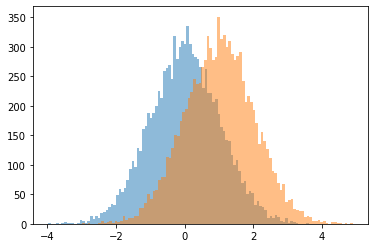

In [37]:
sample = generador.normal(0, 1, 10_000)
sample2 = generador.normal(1, 1, 10_000)

plt.hist(sample, bins=100, alpha=0.5)
plt.hist(sample2, bins=100, alpha=0.5)

plt.savefig(DATA_FOLDER+'grafica_normal.pdf')

(array([3.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.560e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.550e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 8.980e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.345e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.588e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.603e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.372e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.047e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.710e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.370e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.130e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.000e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 5.000e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        9.000e+00, 0.000e+00, 0.000e+0

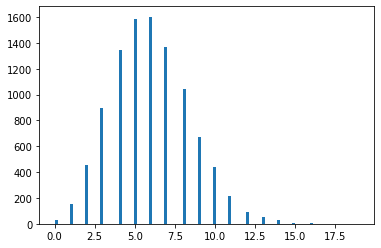

In [39]:
sample_poisson = generador.poisson(6, 10_000)

plt.hist(sample_poisson, bins=100)

# ¿En verdad es más probable tener una hija? (Estadística bayesiana)

El primero en plantearse este problema fue Laplace usando datos de los nacimientos en Paris.

Nosotros veremos lo mismo con los datos de México. Según el censo del 2020 la población de México de 0 años era 1,812,977 de la cual 896,837 son mujeres. 

Lo que haremos es generar valores que se distribuyan Beta(a+1, b+1) con $a$ igual al número de mujeres y $b$ el número de hombres.

La distribución Beta tiene densidad 

$$
f(x) = c(x^{a-1}(1-x)^{b-1})
$$

para $x\in(0, 1)$.